## Download do dataset
No dataset contém o conjunto de treinamento e validação, além das imagens externas para teste com a nossa topologia de rede

In [1]:
import gdown
#Realizando download
!gdown --id '1FViNBCdlh_LFA5oNyElhj_NiIImk8-lb' #id do link de compartilhamento

Downloading...
From: https://drive.google.com/uc?id=1FViNBCdlh_LFA5oNyElhj_NiIImk8-lb
To: /content/dataset4Classes.zip
100% 162M/162M [00:01<00:00, 111MB/s]


In [2]:
#Descompactando dataset para a raiz do notebook
!unzip /content/dataset4Classes.zip

Archive:  /content/dataset4Classes.zip
   creating: dataset4Classes/
   creating: dataset4Classes/ImagensExternas/
   creating: dataset4Classes/ImagensExternas/happy/
  inflating: dataset4Classes/ImagensExternas/happy/guilherme_happy.jpeg  
  inflating: dataset4Classes/ImagensExternas/happy/sherlon_happy.JPG  
   creating: dataset4Classes/ImagensExternas/negative/
  inflating: dataset4Classes/ImagensExternas/negative/guilherme_angry.jpeg  
  inflating: dataset4Classes/ImagensExternas/negative/guilherme_disgust.jpeg  
  inflating: dataset4Classes/ImagensExternas/negative/guilherme_fear.jpeg  
  inflating: dataset4Classes/ImagensExternas/negative/guilherme_sad.jpeg  
  inflating: dataset4Classes/ImagensExternas/negative/sherlon_angry.JPG  
  inflating: dataset4Classes/ImagensExternas/negative/sherlon_disgust.JPG  
  inflating: dataset4Classes/ImagensExternas/negative/sherlon_fear.JPG  
  inflating: dataset4Classes/ImagensExternas/negative/sherlon_sad.JPG  
   creating: dataset4Classes/Im

## Carregando dataset

In [ ]:
import tensorflow as tf #Utilizado para criação da topologia da rede
from keras.preprocessing.image import ImageDataGenerator #Utilizado para leitura das imagens

#Definido de acordo com: https://link.springer.com/article/10.1007/s10489-020-01943-6
batch_size = 1

#Definindo tamanho da imagem para a rede
image_size = (32,32)

#Aplicando data augmentation nas imagens de treinamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   #rotation_range = 50,
                                   #width_shift_range = 0.2,
                                   #height_shift_range = 0.2,
                                   #zoom_range = 0.2,
                                   #horizontal_flip = True,
                                   #vertical_flip = True
                                   )

#Normalização para as imagens de teste
test_datagen = ImageDataGenerator(rescale = 1./255)

#Lendo as imagens de treinamento e aplicando a normalização
training_set = train_datagen.flow_from_directory(
        '/content/dataset4Classes/QIDER/train', #Caminho do diretório de treinamento
        color_mode="grayscale", 
        target_size = image_size,
        batch_size = batch_size,
        class_mode='categorical')

#Lendo as imagens de teste e aplicando a normalização
test_set = test_datagen.flow_from_directory(
        '/content/dataset4Classes/QIDER/val', #Caminho do diretório de teste
        color_mode="grayscale",
        target_size = image_size,
        batch_size = 1,
        class_mode='categorical')

Found 2925 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [ ]:
#Visualizando todas as instâncias para o conjunto de treinamento
training_set.n

2925

In [ ]:
# Passo do treinamento
step_size_train = training_set.n // training_set.batch_size
step_size_train

2925

In [ ]:
#Passo do teste
step_size_test = test_set.n // test_set.batch_size
step_size_test

1000

##Visualizando uma amostra dos dados

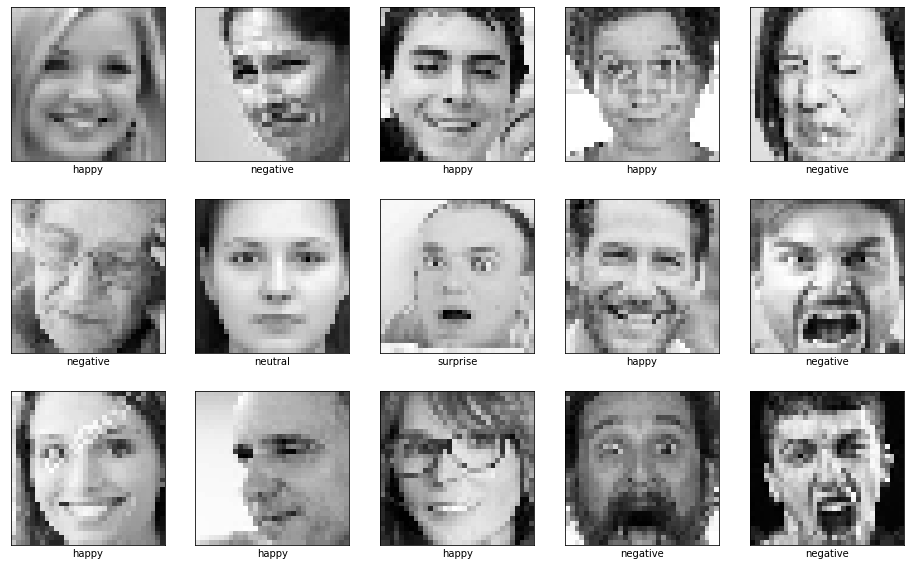

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Visualizando as imagens do dataset
classes = [c for c in test_set.class_indices]

row = 3; col = 5;

plt.figure(figsize = (16,10))
for i in range(row*col): #test_set.n):
    img, label = test_set.next()
    img = np.squeeze(img)
    plt.subplot(row, col, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap="gray")
    plt.xlabel(classes[np.argmax(label)])

plt.show()

##Formatando os dados

In [ ]:
classes = [c for c in training_set.class_indices]

data_train = []
target_train = []

for i in range(training_set.n):
    img, label = training_set.next()
    #img = np.squeeze(img)
    categorial_label = classes[np.argmax(label)]
    data_train.append(np.ravel(img))
    target_train.append(categorial_label)

data_test = []
target_test = []

for i in range(test_set.n):
    img, label = test_set.next()
    #img = np.squeeze(img)
    categorial_label = classes[np.argmax(label)]
    data_test.append(np.ravel(img))
    target_test.append(categorial_label)

In [ ]:
import pandas as pd

#Convertendo em DataFrame
X_train = pd.DataFrame(data_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1.000000,1.000000,1.000000,0.223529,0.172549,0.176471,0.211765,0.415686,0.458824,0.525490,0.647059,0.713726,0.749020,0.772549,0.784314,0.792157,0.784314,0.760784,0.741176,0.733333,0.682353,0.615686,0.529412,0.423529,0.905882,0.925490,0.949020,0.819608,0.709804,0.909804,0.921569,0.964706,1.000000,1.000000,0.992157,0.274510,0.227451,0.231373,0.337255,0.439216,...,0.686275,0.650980,0.988235,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.901961,0.592157,0.686275,0.745098,0.756863,0.780392,0.792157,0.780392,0.772549,0.800000,0.800000,0.807843,0.811765,0.807843,0.764706,0.705882,0.650980,0.588235,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.149020,0.168627,0.345098,0.317647,0.145098,0.494118,0.152941,0.223529,0.105882,0.094118,0.101961,0.247059,0.454902,0.239216,0.054902,0.239216,0.521569,0.411765,0.086275,0.109804,0.615686,0.086275,0.231373,0.309804,0.168627,0.215686,0.109804,0.101961,0.898039,0.905882,0.917647,0.917647,0.098039,0.078431,0.294118,0.211765,0.117647,0.368627,0.156863,0.152941,...,0.607843,0.603922,0.627451,0.901961,0.905882,0.909804,0.913726,0.909804,0.274510,0.235294,0.258824,0.215686,0.176471,0.278431,0.439216,0.062745,0.035294,0.035294,0.035294,0.035294,0.035294,0.035294,0.035294,0.043137,0.050980,0.043137,0.192157,0.035294,0.039216,0.219608,0.403922,0.313726,0.623529,0.592157,0.854902,0.894118,0.905882,0.913726,0.909804,0.913726
2,0.231373,0.254902,0.250980,0.250980,0.235294,0.227451,0.219608,0.235294,0.247059,0.258824,0.227451,0.231373,0.262745,0.270588,0.282353,0.262745,0.207843,0.215686,0.231373,0.274510,0.305882,0.309804,0.301961,0.286275,0.298039,0.321569,0.341176,0.376471,0.478431,0.411765,0.450980,0.450980,0.243137,0.262745,0.254902,0.243137,0.231373,0.235294,0.207843,0.227451,...,0.349020,0.341176,0.356863,0.376471,0.396078,0.458824,0.407843,0.400000,0.254902,0.239216,0.227451,0.227451,0.215686,0.211765,0.207843,0.215686,0.180392,0.168627,0.180392,0.141176,0.235294,0.235294,0.231373,0.239216,0.196078,0.176471,0.176471,0.211765,0.250980,0.286275,0.372549,0.349020,0.364706,0.427451,0.364706,0.360784,0.396078,0.407843,0.396078,0.380392
3,0.007843,0.011765,0.031373,0.019608,0.054902,0.047059,0.035294,0.031373,0.094118,0.090196,0.121569,0.203922,0.313726,0.396078,0.454902,0.478431,0.505882,0.537255,0.556863,0.450980,0.466667,0.439216,0.576471,0.364706,0.282353,0.282353,0.337255,0.372549,0.403922,0.545098,0.458824,0.643137,0.011765,0.000000,0.031373,0.027451,0.019608,0.035294,0.043137,0.058824,...,0.733333,0.772549,0.670588,0.188235,0.317647,0.172549,0.290196,0.156863,0.066667,0.015686,0.090196,0.086275,0.086275,0.078431,0.078431,0.098039,0.145098,0.196078,0.235294,0.282353,0.341176,0.384314,0.450980,0.525490,0.658824,0.725490,0.721569,0.756863,0.709804,0.717647,0.709804,0.729412,0.737255,0.749020,0.215686,0.254902,0.247059,0.137255,0.309804,0.278431
4,0.592157,0.325490,0.549020,0.498039,0.560784,0.427451,0.568627,0.517647,0.725490,0.760784,0.780392,0.784314,0.796079,0.800000,0.811765,0.800000,0.807843,0.807843,0.792157,0.823529,0.823529,0.815686,0.800000,0.780392,0.729412,0.733333,0.741176,0.717647,0.631373,0.537255,0.396078,0.494118,0.478431,0.325490,0.600000,0.509804,0.549020,0.615686,0.666667,0.705882,...,0.552941,0.443137,0.243137,0.274510,0.270588,0.282353,0.301961,0.274510,0.309804,0.301961,0.243137,0.290196,0.282353,0.258824,0.643137,0.647059,0.662745,0.670588,0.670588,0.647059,0.635294,0.600000,0.580392,0.560784,0.588235,0.631373,0.721569,0.780392,0.721569,0.784314,0.752941,0.623529,0.498039,0.274510,0.258824,0.298039,0.250980,0.274510,0.258824,0.337255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
#Convertendo em DataFrame
X_test = pd.DataFrame(data_test)
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.333333,0.113725,0.133333,0.070588,0.098039,0.105882,0.098039,0.125490,0.098039,0.149020,0.125490,0.188235,0.301961,0.309804,0.313726,0.274510,0.274510,0.231373,0.203922,0.156863,0.117647,0.121569,0.184314,0.203922,0.184314,0.129412,0.113725,0.133333,0.113725,0.160784,0.105882,0.133333,0.325490,0.137255,0.113725,0.086275,0.094118,0.090196,0.117647,0.113725,...,0.286275,0.247059,0.231373,0.250980,0.207843,0.184314,0.145098,0.113725,0.294118,0.298039,0.266667,0.298039,0.309804,0.325490,0.309804,0.258824,0.227451,0.105882,0.129412,0.396078,0.172549,0.282353,0.200000,0.145098,0.168627,0.227451,0.274510,0.301961,0.305882,0.294118,0.278431,0.274510,0.258824,0.258824,0.231373,0.196078,0.180392,0.125490,0.129412,0.090196
1,0.521569,0.321569,0.309804,0.419608,0.219608,0.294118,0.337255,0.278431,0.305882,0.521569,0.623529,0.611765,0.545098,0.549020,0.556863,0.435294,0.462745,0.388235,0.341176,0.321569,0.227451,0.203922,0.094118,0.137255,0.086275,0.101961,0.105882,0.105882,0.713726,0.709804,0.686275,0.666667,0.450980,0.517647,0.552941,0.400000,0.203922,0.286275,0.376471,0.650980,...,0.176471,0.239216,0.788235,0.784314,0.756863,0.760784,0.756863,0.752941,0.760784,0.776471,0.768628,0.768628,0.764706,0.776471,0.729412,0.733333,0.403922,0.376471,0.509804,0.564706,0.313726,0.325490,0.341176,0.298039,0.243137,0.172549,0.168627,0.156863,0.192157,0.172549,0.152941,0.180392,0.207843,0.717647,0.788235,0.764706,0.760784,0.760784,0.741176,0.745098
2,0.525490,0.517647,0.505882,0.505882,0.513726,0.478431,0.454902,0.439216,0.447059,0.662745,0.741176,0.768628,0.811765,0.831373,0.823529,0.878431,0.580392,0.764706,0.807843,0.764706,0.701961,0.658824,0.627451,0.603922,0.572549,0.549020,0.505882,0.466667,0.411765,0.364706,0.345098,0.301961,0.521569,0.517647,0.525490,0.517647,0.517647,0.470588,0.458824,0.439216,...,0.686275,0.584314,0.313726,0.372549,0.317647,0.439216,0.423529,0.517647,0.556863,0.584314,0.501961,0.478431,0.450980,0.443137,0.376471,0.313726,0.384314,0.337255,0.337255,0.717647,0.717647,0.478431,0.380392,0.317647,0.403922,0.647059,0.490196,0.490196,0.549020,0.780392,0.627451,0.572549,0.631373,0.376471,0.341176,0.317647,0.482353,0.384314,0.509804,0.501961
3,0.639216,0.639216,0.631373,0.635294,0.141176,0.105882,0.098039,0.109804,0.082353,0.043137,0.109804,0.168627,0.235294,0.239216,0.250980,0.262745,0.278431,0.301961,0.337255,0.349020,0.368627,0.380392,0.380392,0.384314,0.352941,0.356863,0.321569,0.168627,0.105882,0.113725,0.094118,0.078431,0.639216,0.639216,0.635294,0.552941,0.133333,0.105882,0.105882,0.082353,...,0.019608,0.019608,0.019608,0.019608,0.019608,0.039216,0.027451,0.043137,0.121569,0.121569,0.086275,0.211765,0.117647,0.172549,0.066667,0.047059,0.027451,0.015686,0.019608,0.019608,0.019608,0.043137,0.070588,0.039216,0.070588,0.066667,0.078431,0.074510,0.031373,0.027451,0.023529,0.023529,0.027451,0.023529,0.023529,0.023529,0.023529,0.031373,0.023529,0.058824
4,0.921569,0.921569,0.917647,0.921569,0.431373,0.501961,0.733333,0.705882,0.741176,0.721569,0.752941,0.721569,0.725490,0.607843,0.431373,0.454902,0.411765,0.400000,0.639216,0.643137,0.635294,0.615686,0.584314,0.572549,0.603922,0.654902,0.584314,0.525490,0.298039,0.176471,0.231373,0.247059,0.921569,0.921569,0.921569,0.898039,0.329412,0.643137,0.725490,0.733333,...,0.772549,0.333333,0.952941,0.901961,0.890196,0.886275,0.886275,0.886275,0.925490,0.925490,0.925490,0.913726,0.933333,0.352941,0.356863,0.713726,0.756863,0.764706,0.752941,0.729412,0.643137,0.549020,0.568627,0.545098,0.556863,0.615686,0.650980,0.733333,0.772549,0.776471,0.784314,0.807843,0.768628,0.239216,0.956863,0.945098,0.890196,0.882353,0.886275,0.882353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
#Convertendo em DataFrame
y_train = pd.DataFrame(target_train)
y_train

,0
0,happy
1,negative
2,happy
3,happy
4,negative
...,...
2920,negative
2921,negative
2922,negative
2923,surprise


In [ ]:
#Convertendo em DataFrame
y_test = pd.DataFrame(target_test)
y_test

,0
0,negative
1,negative
2,negative
3,negative
4,happy
...,...
995,happy
996,negative
997,happy
998,negative


##Oversampling (Conjunto de treinamento)

In [ ]:
#Classes desbalanceadas
y_train.value_counts()

negative    1660
happy        746
surprise     404
neutral      115
dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

def oversample_imblearn(inputs, targets):
  oversample = RandomOverSampler(sampling_strategy='all')
  oversampled_data, oversampled_targets = oversample.fit_resample(inputs, targets)
  return oversampled_data, oversampled_targets

oversampled_data, oversampled_targets = oversample_imblearn(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [ ]:
#Classes balanceadas
resample = pd.DataFrame(oversampled_targets)
resample.value_counts()

surprise    1660
neutral     1660
negative    1660
happy       1660
dtype: int64

## Arquitetura da rede

In [ ]:
#Importando bibliotecas utilizadas para definição da topologia de rede
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import RMSprop

num_classes = len(test_set.class_indices) #Pegando o total de classes do dataset

input_shape = (32,32,1) 

#Arquietetura de rede baseada em: https://link.springer.com/article/10.1007/s10489-020-01943-6
def get_model():

  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape = input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(filters=16, kernel_size=(4, 4), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.3))

  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.3))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [ ]:
#Visualizando toda a rede
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 8)           1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0

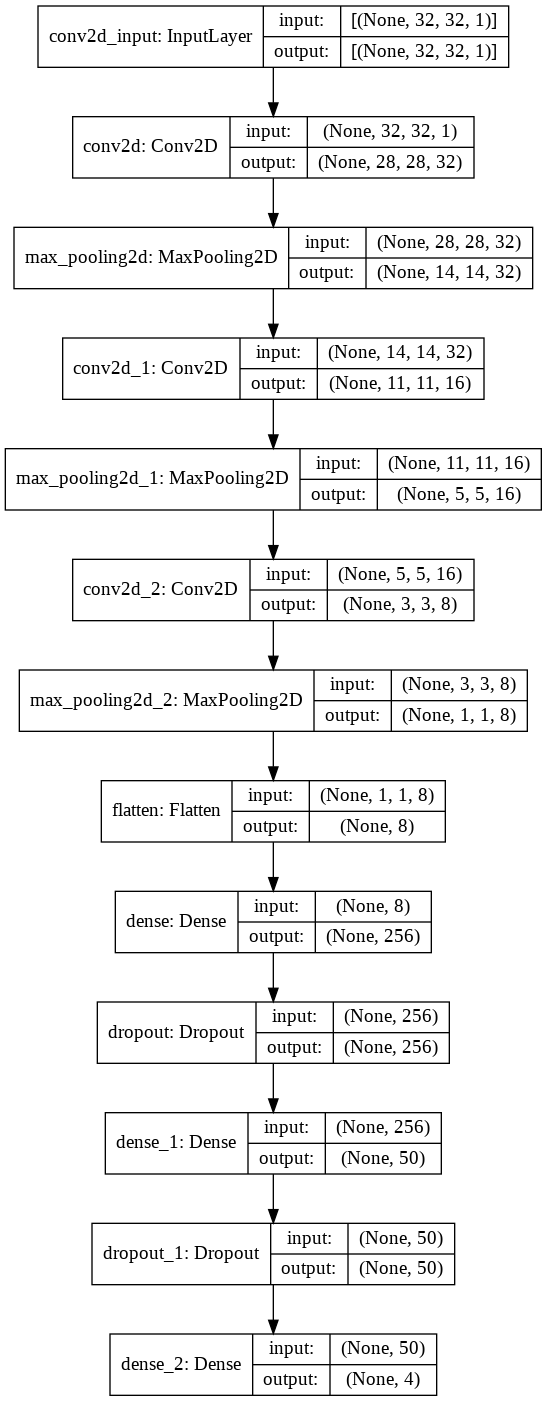

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='topologia.png', show_shapes=True, show_layer_names=True)  

## Treinamento

###Conjunto de Treinamento

In [ ]:
#Convertendo as imagens 1D em 2D
oversampled_data2D = np.array(oversampled_data).reshape(-1, 32, 32, 1)
oversampled_data2D.shape

(6640, 32, 32, 1)

In [ ]:
oversampled_targets2D = [[v] for v in oversampled_targets]
oversampled_targets2D

[['happy'],
 ['negative'],
 ['happy'],
 ['happy'],
 ['negative'],
 ['happy'],
 ['negative'],
 ['surprise'],
 ['negative'],
 ['surprise'],
 ['happy'],
 ['happy'],
 ['surprise'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['surprise'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['surprise'],
 ['negative'],
 ['surprise'],
 ['happy'],
 ['negative'],
 ['negative'],
 ['surprise'],
 ['negative'],
 ['happy'],
 ['negative'],
 ['happy'],
 ['surprise'],
 ['negative'],
 ['surprise'],
 ['negative'],
 ['negative'],
 ['happy'],
 ['negative'],
 ['happy'],
 ['negative'],
 ['neutral'],
 ['negative'],
 ['surprise'],
 ['negative'],
 ['negative'],
 ['happy'],
 ['happy'],
 ['happy'],
 ['negative'],
 ['negative'],
 ['happy'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['happy'],
 ['surprise'],
 ['negative'],
 ['happy'],
 ['negative'],
 ['negative'],
 ['negative'],
 [

In [ ]:
# Módulo de preprocessamento do Sklearn
from sklearn import preprocessing

#One hot encoder
encoder = preprocessing.OneHotEncoder() # Encoder
encoder.fit(oversampled_targets2D) # Ajustando o encoder
scaled_data_train = encoder.transform(oversampled_targets2D).toarray() # Transformando os dados do encoder
print('Dados codificados:\n', scaled_data_train)

Dados codificados:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


###Conjunto de Teste


In [ ]:
#Convertendo as imagens 1D em 2D
test_data2D = np.array(X_test).reshape(-1, 32, 32, 1)
test_data2D.shape

(1000, 32, 32, 1)

In [ ]:
test_targets2D = [[v] for v in y_test[0]]
test_targets2D

[['negative'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['happy'],
 ['happy'],
 ['happy'],
 ['happy'],
 ['happy'],
 ['happy'],
 ['happy'],
 ['negative'],
 ['happy'],
 ['negative'],
 ['negative'],
 ['neutral'],
 ['negative'],
 ['happy'],
 ['happy'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['neutral'],
 ['negative'],
 ['happy'],
 ['happy'],
 ['negative'],
 ['negative'],
 ['surprise'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['happy'],
 ['negative'],
 ['negative'],
 ['happy'],
 ['happy'],
 ['happy'],
 ['surprise'],
 ['happy'],
 ['happy'],
 ['happy'],
 ['negative'],
 ['surprise'],
 ['negative'],
 ['happy'],
 ['happy'],
 ['happy'],
 ['happy'],
 ['happy'],
 ['happy'],
 ['negative'],
 ['happy'],
 ['happy'],
 ['neutral'],
 ['neutral'],
 ['surprise'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['happy'],
 ['negative'],
 ['negative'],
 ['happy'],
 ['negative'],
 ['surprise'],
 ['negative'],
 ['happy'],
 ['surprise'],
 ['neutral'],
 ['negative'],
 ['happy'],
 ['happy'],
 ['hap

In [ ]:
# Módulo de preprocessamento do Sklearn
from sklearn import preprocessing

#One hot encoder
encoder = preprocessing.OneHotEncoder() # Encoder
encoder.fit(test_targets2D) # Ajustando o encoder
scaled_data_test = encoder.transform(test_targets2D).toarray() # Transformando os dados do encoder
print('Dados codificados:\n', scaled_data_test)

Dados codificados:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
#Importando bibliotecas para os callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

filepath="/content/nossa_cnn.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_weights_only=True, mode='max')
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, min_delta = 1e-5, patience = 2, verbose=1)
early = EarlyStopping(monitor='val_accuracy', patience = 10, mode='max')

callbacks = [early, checkpoint, lr_reduce]

epochs = 100

history = model.fit(oversampled_data2D,
                    scaled_data_train,
                    batch_size=32,
                    epochs=epochs,
                    validation_data=(test_data2D, scaled_data_test)
                    )

Epoch 1/100
208/208 [==============================] - 32s 8ms/step - loss: 1.3874 - accuracy: 0.2380 - val_loss: 1.3871 - val_accuracy: 0.0770
Epoch 2/100
208/208 [==============================] - 1s 6ms/step - loss: 1.3867 - accuracy: 0.2461 - val_loss: 1.3701 - val_accuracy: 0.4650
Epoch 3/100
208/208 [==============================] - 1s 6ms/step - loss: 1.3871 - accuracy: 0.2405 - val_loss: 1.3871 - val_accuracy: 0.0450
Epoch 4/100
208/208 [==============================] - 1s 6ms/step - loss: 1.3501 - accuracy: 0.3137 - val_loss: 1.3757 - val_accuracy: 0.1030
Epoch 5/100
208/208 [==============================] - 1s 6ms/step - loss: 1.1953 - accuracy: 0.4355 - val_loss: 1.3629 - val_accuracy: 0.2930
Epoch 6/100
208/208 [==============================] - 1s 6ms/step - loss: 1.0221 - accuracy: 0.5452 - val_loss: 1.2393 - val_accuracy: 0.4280
Epoch 7/100
208/208 [==============================] - 1s 6ms/step - loss: 0.8519 - accuracy: 0.6373 - val_loss: 1.2057 - val_accuracy: 0.457

In [ ]:
print(oversampled_data2D.shape, scaled_data_train.shape, test_data2D.shape, scaled_data_test.shape)

(6640, 32, 32, 1) (6640, 4) (1000, 32, 32, 1) (1000, 4)


## Curvas de aprendizagem

In [ ]:
#Acurácia treinamento
import numpy as np
np.mean(history.history['val_accuracy'])

0.5382399965077639

In [ ]:
#Desvio padrão treinamento
np.std(history.history['val_accuracy'])

0.09091491782370176

In [ ]:
np.max(history.history['val_accuracy'])

0.6019999980926514

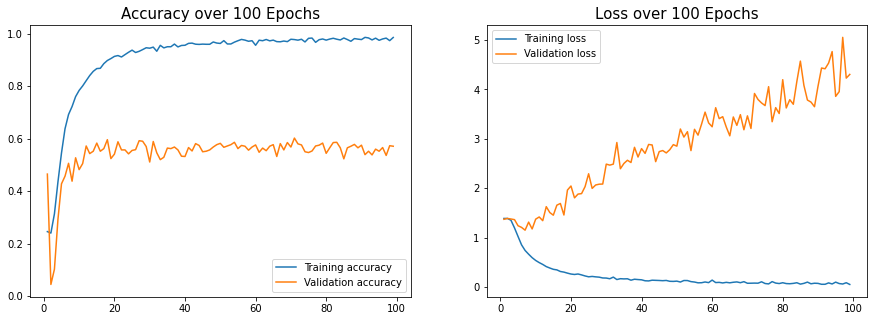

In [ ]:
#Visualizando os gráficos de convergência da rede
import matplotlib.pyplot as plt
%matplotlib inline

epochs = len(history.history['val_accuracy']) #Pegando a quantidade de vezes que foi treinado com o early stoping

def plot_acc_loss(history, epochs):

 acc = history.history['accuracy']
 loss = history.history['loss']
 val_acc = history.history['val_accuracy']
 val_loss = history.history['val_loss']
 plt.figure(figsize=(15, 5))

 #Convergência do treinamento 
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Training accuracy')
 plt.plot(range(1,epochs), val_acc[1:], label='Validation accuracy')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 #---

 #Convergência do teste 
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Training loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Validation loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend();
 plt.show()
 #---

plot_acc_loss(history, epochs)

## Recarregando o modelo






In [ ]:
from keras.models import load_model

#Salvando o modelo
model.save('saved_model.h5')

In [ ]:
reload_model = tf.keras.models.load_model('saved_model.h5')

In [ ]:
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 8)           1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0

#Imagens Externas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image_size = (32, 32)

#Normalizando as imagens
datagen = ImageDataGenerator(
    rescale=1./255
)

#Referencia: https://keras.io/api/preprocessing/image/
#Lendo as imagens externas para validação
dir_It = datagen.flow_from_directory(
    '/content/dataset4Classes/ImagensExternas',
    color_mode="grayscale",
    target_size = image_size,
    batch_size = 1,
    class_mode='categorical',
    shuffle=False, #Ordem alfabética
)

Found 14 images belonging to 4 classes.


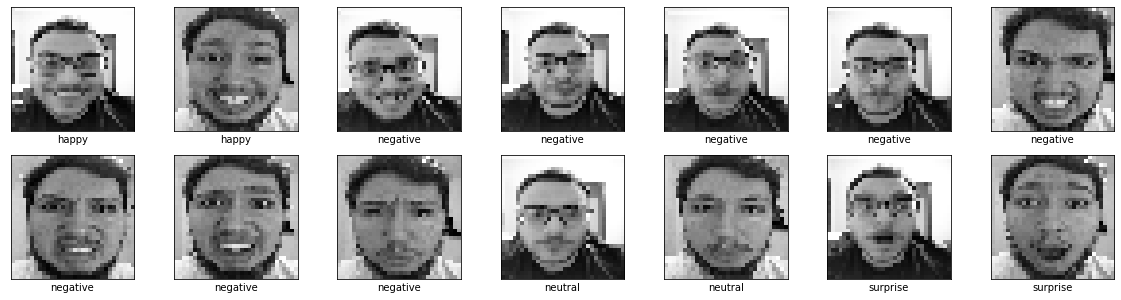

In [ ]:
#Visualizando as imagens externas
classes = [c for c in dir_It.class_indices]

plt.figure(figsize = (20,5))
for i in range(dir_It.n):
    img, label = dir_It.next()
    img = np.squeeze(img)
    
    #Ajustando rotacionamento das imagens
    if "sherlon" in dir_It.filenames[i]:
      img = np.transpose(img)
    
    plt.subplot(2, dir_It.n//2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap="gray")
    plt.xlabel(classes[np.argmax(label)])

plt.show()

In [ ]:
#Pega todas as imagens do teste
filenames = dir_It.filenames
filenames

['happy/guilherme_happy.jpeg',
 'happy/sherlon_happy.JPG',
 'negative/guilherme_angry.jpeg',
 'negative/guilherme_disgust.jpeg',
 'negative/guilherme_fear.jpeg',
 'negative/guilherme_sad.jpeg',
 'negative/sherlon_angry.JPG',
 'negative/sherlon_disgust.JPG',
 'negative/sherlon_fear.JPG',
 'negative/sherlon_sad.JPG',
 'neutral/guilherme_neutral.jpeg',
 'neutral/sherlon_neutral.JPG',
 'surprise/guilherme_surprise.jpeg',
 'surprise/sherlon_surprise.JPG']

In [ ]:
#Realizando previsões de todas as imagens de validação
pred = reload_model.predict(dir_It, steps = len(filenames))

In [ ]:
#Retorna as probabilidades
pred

array([[8.92878234e-01, 1.07120946e-01, 3.43263973e-10, 8.26740916e-07],
       [1.49641957e-04, 9.99829412e-01, 6.95428343e-17, 2.08589208e-05],
       [9.47947800e-01, 5.20521738e-02, 1.07481726e-15, 1.32176757e-12],
       [2.11693332e-05, 9.97829497e-01, 2.84584661e-10, 2.14930554e-03],
       [3.61609932e-06, 9.99986172e-01, 2.80136891e-09, 1.02015392e-05],
       [1.02636761e-06, 8.10210705e-02, 1.49142677e-11, 9.18977916e-01],
       [6.64786026e-02, 9.33491945e-01, 3.37062288e-11, 2.94857746e-05],
       [5.33991167e-03, 9.94660079e-01, 7.81147946e-09, 1.28072521e-08],
       [9.99996781e-01, 3.22026472e-06, 4.52360846e-27, 2.90926427e-19],
       [3.44917702e-04, 9.95902359e-01, 3.75273847e-03, 3.95894689e-13],
       [1.75826040e-06, 6.85944408e-02, 9.31403756e-01, 3.59822938e-17],
       [3.07345260e-07, 9.99998569e-01, 9.32829231e-11, 1.10360656e-06],
       [3.71387601e-02, 9.46317971e-01, 2.62018002e-05, 1.65171120e-02],
       [6.09202206e-01, 3.90797853e-01, 2.33622538e

In [ ]:
#Pegando as probailidades
predictions = []
for i in range(len(pred)):
  predictions.append(np.argmax(pred[i]))

In [ ]:
predictions

[0, 1, 0, 1, 1, 3, 1, 1, 0, 1, 2, 1, 1, 0]

In [ ]:
#Fazendo previsão com as imagens reais
dir_It.classes

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
#Acurácia da rede
accuracy_score(predictions, dir_It.classes)

0.5

# Aplicando Transfer Learning


## Testando base de dados com a rede MobileNet

In [3]:
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
image_size = (128,128)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
        '/content/dataset4Classes/QIDER/train',
        #color_mode="rbg",
        target_size = image_size,
        batch_size = batch_size,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        '/content/dataset4Classes/QIDER/val',
        #color_mode="rgb",
        target_size = image_size,
        batch_size = 1,
        class_mode='categorical')

Found 2925 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [4]:
training_set.n

2925

In [5]:
# Passo do treinamento
step_size_train = training_set.n // training_set.batch_size
step_size_train

91

In [6]:
#Passo do teste
step_size_test = test_set.n // test_set.batch_size
step_size_test

1000

In [7]:
def create_model():

  num_classes = len(test_set.class_indices) 

  base_model = tf.keras.applications.MobileNet(weights = 'imagenet', include_top=False, input_shape=(128, 128, 3))

  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dense(1024, activation='relu')(x)
  x = tf.keras.layers.Dense(1024, activation='relu')(x)
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  x = tf.keras.layers.Dense(256, activation='relu')(x)

  preds = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

  model = tf.keras.Model(inputs = base_model.input, outputs = preds)

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [8]:
model = create_model()
model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
______________________________________________________________

In [9]:
#Visualizando camadas
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_1
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

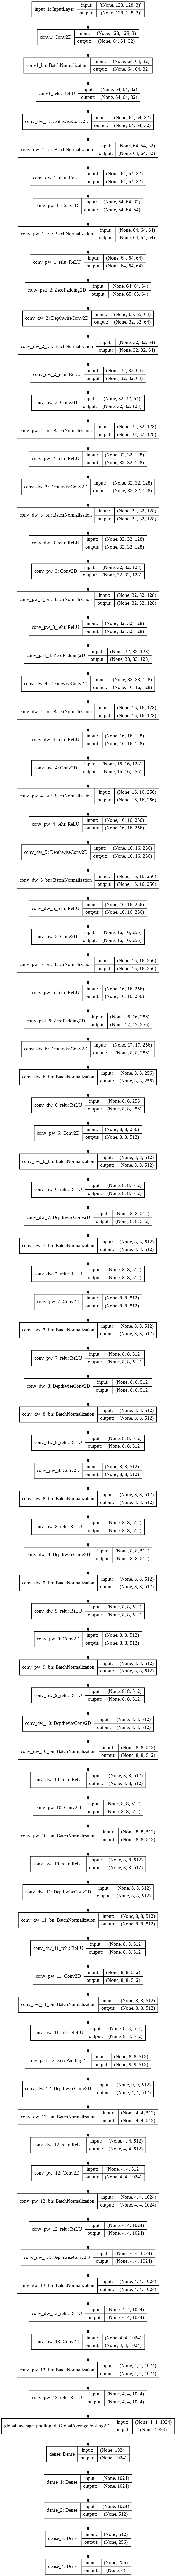

In [10]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='mobilenet.png', show_shapes=True, show_layer_names=True)  

In [11]:
#Congelando camadas da MobileNet, para utilizar com os pesos já treinados
for layer in model.layers[:86]:
  layer.trainable = False

In [12]:
#Descongelando a parte personalizada, criada acima com as camadas densas
for layer in model.layers[86:]:
  layer.trainable = True

In [13]:
#Treinando a rede com os parâmetros
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

filepath="/content/teste_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, min_delta = 1e-5, patience = 3, verbose=1)
early = EarlyStopping(monitor='val_accuracy', patience = 6, mode='max')

callbacks = [early, checkpoint, lr_reduce]


epochs = 100
history = model.fit(training_set,
                    epochs = epochs,
                    steps_per_epoch = step_size_train,
                    validation_data = test_set,
                    validation_steps = step_size_test,
                    callbacks = [callbacks]
                    )

Epoch 1/100
91/91 [==============================] - 62s 315ms/step - loss: 0.8636 - accuracy: 0.6702 - val_loss: 1.3067 - val_accuracy: 0.6310

Epoch 00001: val_accuracy improved from -inf to 0.63100, saving model to /content/teste_weights.hdf5
Epoch 2/100
91/91 [==============================] - 28s 306ms/step - loss: 0.6803 - accuracy: 0.7470 - val_loss: 0.6908 - val_accuracy: 0.7690

Epoch 00002: val_accuracy improved from 0.63100 to 0.76900, saving model to /content/teste_weights.hdf5
Epoch 3/100
91/91 [==============================] - 27s 302ms/step - loss: 0.6189 - accuracy: 0.7750 - val_loss: 0.8545 - val_accuracy: 0.6580

Epoch 00003: val_accuracy did not improve from 0.76900
Epoch 4/100
91/91 [==============================] - 27s 301ms/step - loss: 0.5917 - accuracy: 0.7767 - val_loss: 0.9475 - val_accuracy: 0.7500

Epoch 00004: val_accuracy did not improve from 0.76900
Epoch 5/100
91/91 [==============================] - 27s 300ms/step - loss: 0.5572 - accuracy: 0.8023 - v

In [14]:
#Acurácia treinamento 
import numpy as np 
np.mean(history.history['val_accuracy'])

0.8002399969100952

In [15]:
#Desvio padrão treinamento
np.std(history.history['val_accuracy'])

0.05500129675964457

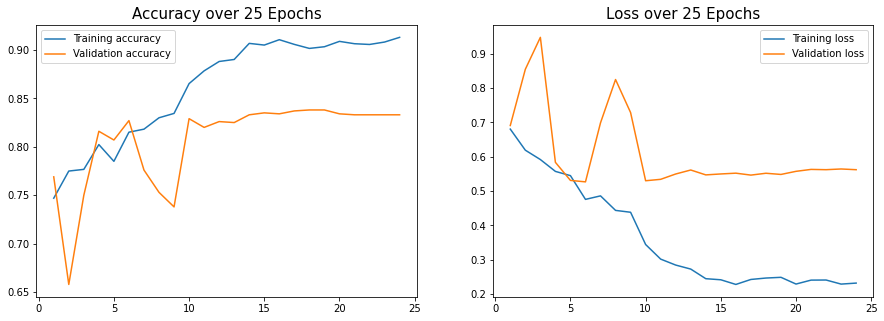

In [16]:
#Visualizando os gráficos de convergência da rede
import matplotlib.pyplot as plt
%matplotlib inline

epochs = len(history.history['val_accuracy']) #Pegando a quantidade de vezes que foi treinado com o early stoping

def plot_acc_loss(history, epochs):

 acc = history.history['accuracy']
 loss = history.history['loss']
 val_acc = history.history['val_accuracy']
 val_loss = history.history['val_loss']
 plt.figure(figsize=(15, 5))

 #Convergência do treinamento 
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Training accuracy')
 plt.plot(range(1,epochs), val_acc[1:], label='Validation accuracy')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 #---

 #Convergência do teste 
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Training loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Validation loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend();
 plt.show()
 #---

plot_acc_loss(history, epochs)

## Previsões com imagens externas

In [17]:
import matplotlib.pyplot as plt
import numpy as np

image_size = (128, 128)

#Normalizando as imagens
datagen = ImageDataGenerator(
    rescale=1./255
)

#Referencia: https://keras.io/api/preprocessing/image/
#Lendo as imagens externas para validação
dir_It = datagen.flow_from_directory(
    '/content/dataset4Classes/ImagensExternas',
    #color_mode="grayscale",
    target_size = image_size,
    batch_size = 1,
    class_mode='categorical',
    shuffle=False, #Ordem alfabética
)

Found 14 images belonging to 4 classes.


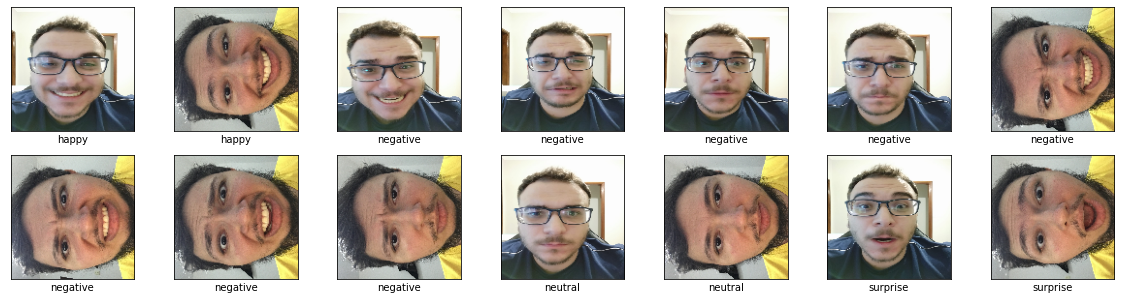

In [18]:
#Visualizando as imagens externas
classes = [c for c in dir_It.class_indices]

plt.figure(figsize = (20,5))
for i in range(dir_It.n):
    img, label = dir_It.next()
    img = np.squeeze(img)
    #print(img.shape)
    
    plt.subplot(2, dir_It.n//2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.xlabel(classes[np.argmax(label)])

plt.show()

In [19]:
#Pega todas as imagens do teste
filenames = dir_It.filenames
filenames

['happy/guilherme_happy.jpeg',
 'happy/sherlon_happy.JPG',
 'negative/guilherme_angry.jpeg',
 'negative/guilherme_disgust.jpeg',
 'negative/guilherme_fear.jpeg',
 'negative/guilherme_sad.jpeg',
 'negative/sherlon_angry.JPG',
 'negative/sherlon_disgust.JPG',
 'negative/sherlon_fear.JPG',
 'negative/sherlon_sad.JPG',
 'neutral/guilherme_neutral.jpeg',
 'neutral/sherlon_neutral.JPG',
 'surprise/guilherme_surprise.jpeg',
 'surprise/sherlon_surprise.JPG']

In [20]:
#Realizando previsões de todas as imagens de validação
pred = model.predict(dir_It, steps = len(filenames))

In [21]:
#Retorna as probabilidades
pred

array([[4.9780974e-01, 2.3455827e-01, 1.8559899e-03, 2.6577598e-01],
       [2.8049462e-02, 1.2114039e-01, 4.8233781e-04, 8.5032779e-01],
       [8.5154198e-02, 4.6385819e-01, 1.2934818e-03, 4.4969416e-01],
       [2.5335234e-01, 6.7743611e-01, 3.5592733e-04, 6.8855643e-02],
       [6.7797895e-03, 3.4078535e-01, 2.2140901e-04, 6.5221345e-01],
       [5.0970398e-02, 6.8192124e-01, 1.3328298e-03, 2.6577547e-01],
       [2.5744478e-03, 8.7491840e-01, 2.1944885e-04, 1.2228781e-01],
       [4.3674380e-02, 4.2466399e-01, 1.3258371e-03, 5.3033584e-01],
       [2.7492024e-02, 1.3239375e-01, 4.9490528e-04, 8.3961934e-01],
       [1.9755283e-02, 8.0148584e-01, 1.8836561e-03, 1.7687528e-01],
       [5.1652171e-02, 4.4245893e-01, 7.4086315e-04, 5.0514799e-01],
       [3.1244417e-03, 8.5839486e-01, 2.9826845e-04, 1.3818246e-01],
       [1.6988713e-02, 7.0467085e-01, 2.2623972e-04, 2.7811417e-01],
       [1.6639538e-02, 1.1417951e-01, 3.0176606e-04, 8.6887920e-01]],
      dtype=float32)

In [22]:
#Pegando as probailidades
predictions = []
for i in range(len(pred)):
  predictions.append(np.argmax(pred[i]))

In [23]:
predictions

[0, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3]

In [24]:
#Fazendo previsão com as imagens reais
dir_It.classes

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3], dtype=int32)

In [25]:
#Acurácia da rede
from sklearn.metrics import accuracy_score
accuracy_score(predictions, dir_It.classes)

0.5